## This is the assignment on multiple linear regression to predict the sale of bikes based on the avaialble data.

## lets follow the steps to know what the final model.


## 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## 2. Reading, understanding, cleaning & visualizing the data

In [2]:
## Step 1 - Reading, Understanding & visualizing the data
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()
#There is no null values which is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# remove the columns that are not requried, like-  casual/registred as as we only have to use cnt as output field.
#we don't require the instant field as it just index, from dteday we have already taken the year, month, day details out so we can drop those as well.
df.drop(['registered', 'casual', 'dteday', 'instant'], axis=1, inplace=True)

### Correcting the data with proper name

In [7]:
# update name of categorical value to proper names-

#Season
def map_seasons(df, column_name):
    season_mapping = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
    return df[column_name].map(season_mapping)

#Month
def map_month(df, column_name):
    month_mapping = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
    return df[column_name].map(month_mapping)

#Weekday
def map_weekday(df, column_name):
    weekday_mapping = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
    return df[column_name].map(weekday_mapping)

#weathersit
def map_weathersit(df, column_name):
    weathersit_mapping = {1:"Clear", 2:"Mist", 3:"Snow", 4:"Rain"}
    return df[column_name].map(weathersit_mapping)

df['season'] = map_seasons(df, 'season')
df['mnth'] = map_month(df, 'mnth')
df['weekday'] = map_weekday(df, 'weekday')
df['weathersit'] = map_weathersit(df, 'weathersit')


df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### EDA

In [8]:
#box plot for categorical columns - Season, month , weekday & weathersit   
def display_boxplot(df, x_column, y_column):
    sns.boxplot(x= df[x_column], y = df[y_column])
    plt.show()

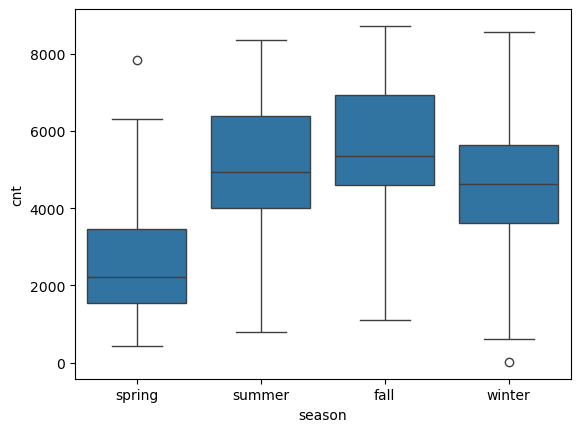

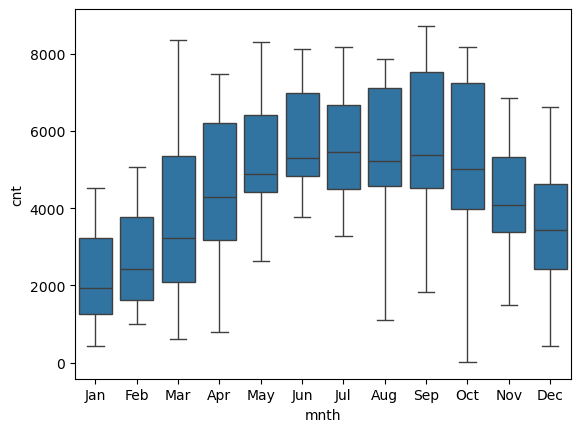

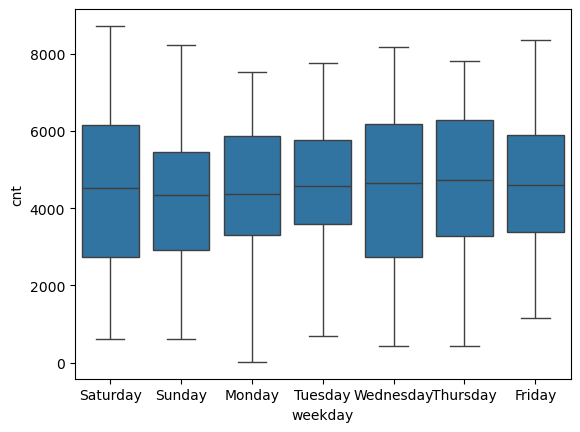

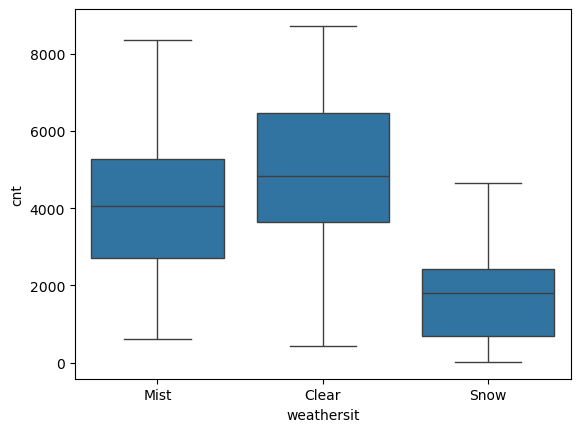

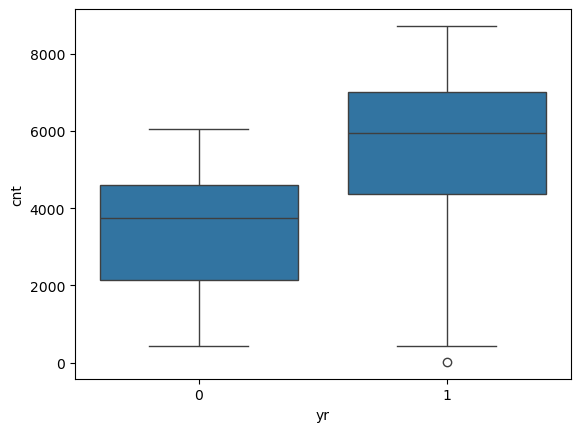

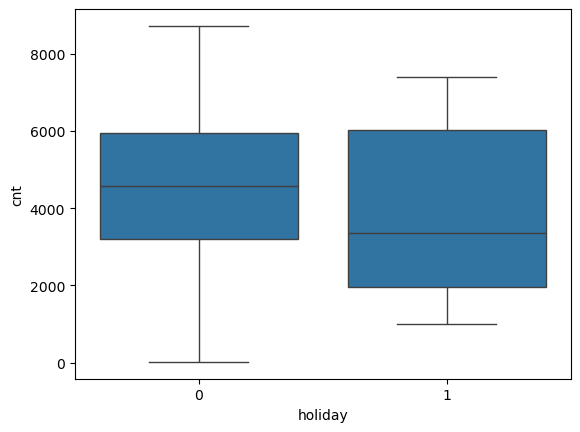

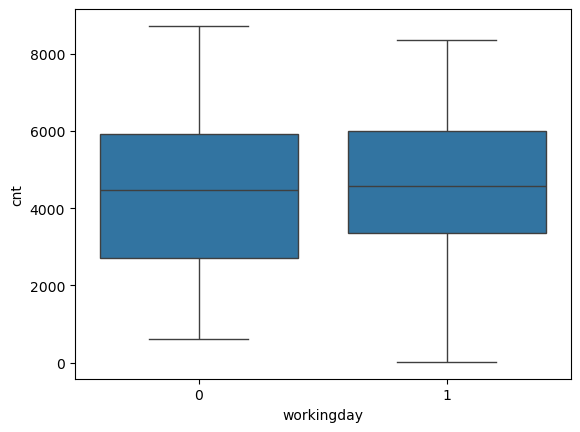

In [9]:
display_boxplot(df, "season","cnt")
display_boxplot(df, "mnth","cnt")
display_boxplot(df, "weekday","cnt")
display_boxplot(df, "weathersit","cnt")
display_boxplot(df, "yr","cnt")
display_boxplot(df, "holiday","cnt")
display_boxplot(df, "workingday","cnt")

### Findings-
#### Spring has least sales followed by winter & Summer/falls have max sale of biles
#### Nov Dec Jan & Feb has comparatively low sales.
#### We have no sales during Rain & lowest when it Snows.
#### 2019 was great in term of sales.
#### During non holiday we have better sales.



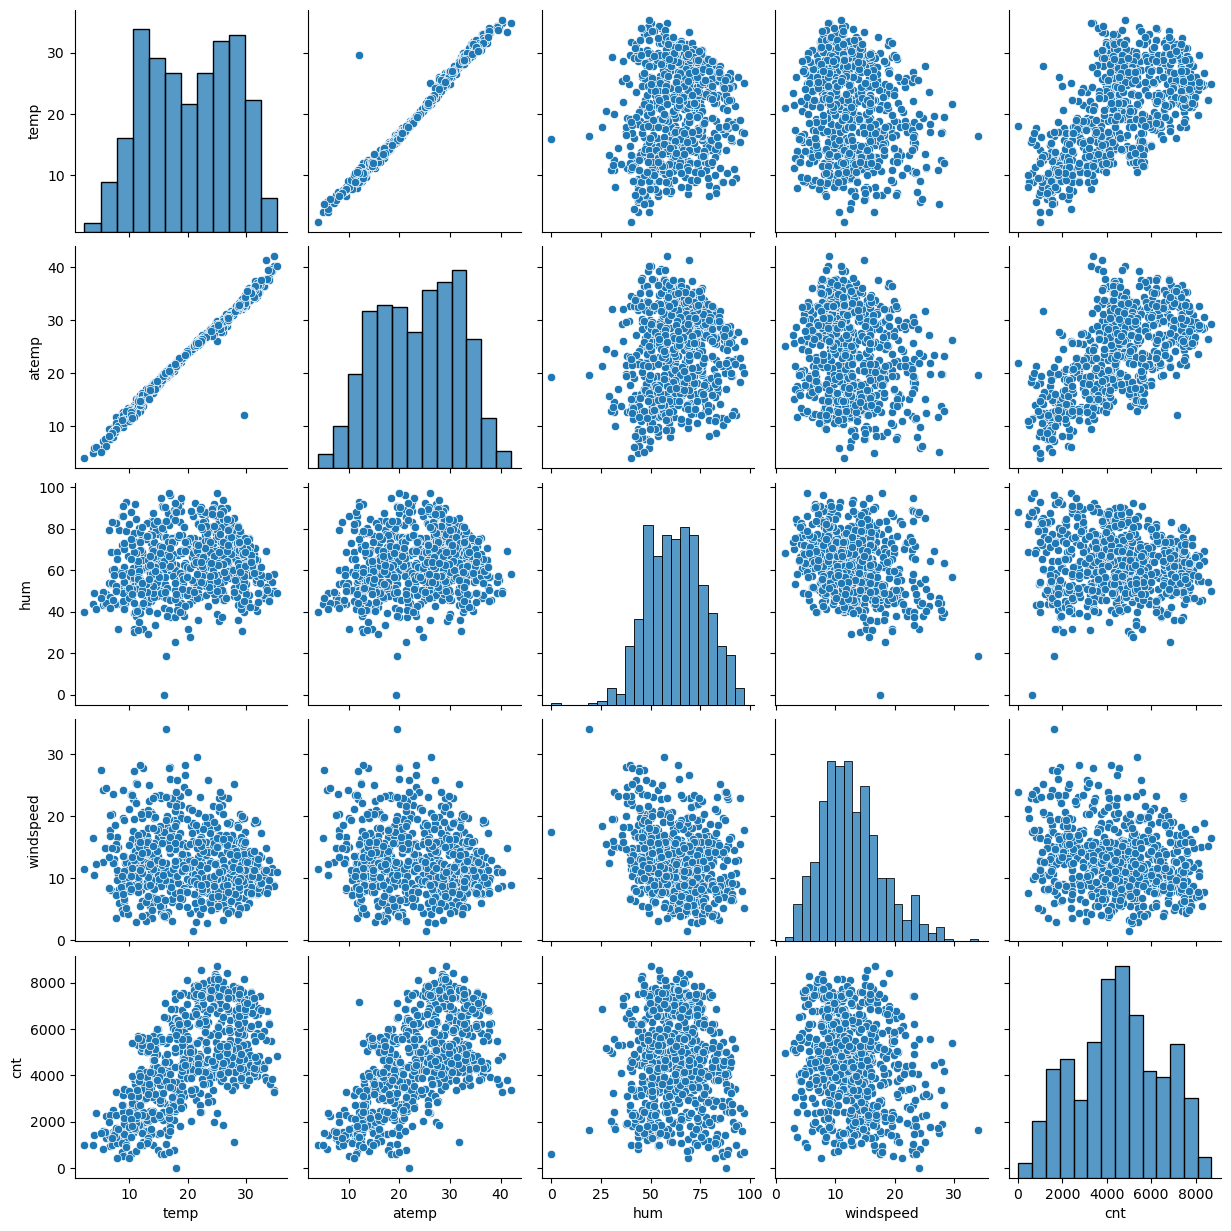

In [10]:
# Visualize the numerical data
sns.pairplot(df[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

### Findings-
#### temperature & atemp have positive inclination towards sale, more the temp more the sale.
#### humidity & windspeed are not impacting the sale based on this graph.

### Actions-
#### We can remove temp & keep only atemp as both are highly correlated, so keeping both will not help much.

### Creating Dummy Variables

In [11]:
# Now lets make these categorical as dummy variable -season,mnth,weekday,weathersit
#create season dummy variables for the model
seasons = pd.get_dummies(df.season , drop_first=True, dtype=int)
mnth = pd.get_dummies(df.mnth , drop_first=True, dtype=int)
weekday = pd.get_dummies(df.weekday , drop_first=True, dtype=int)
weathersit = pd.get_dummies(df.weathersit , drop_first=True, dtype=int)


seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [12]:
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [13]:
weathersit.head()

,Mist,Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [14]:
#let concat these new fiels & remove the exising field-
df = pd.concat([df, seasons,mnth,weekday,weathersit] ,axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# lets drop the fields we got dummy field from & the weekday feild
#for month I am not sure if requred will add later.
df.drop(['season', 'weathersit', 'weekday', 'mnth'], axis=1, inplace=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## 3. Preparing the data for modelling (train- test split, rescaling)

In [16]:
# split the data in train & test
df_train, df_test = train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)


(510, 30)
(220, 30)


In [17]:
# we have atemp whose value is different from others, so they need to scaled to match the other fields-
scaler = MinMaxScaler()
#apply scaler to all categorical columns- temp	atemp	hum	windspeed	cnt	
num_vars = ['temp','atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


In [18]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the model

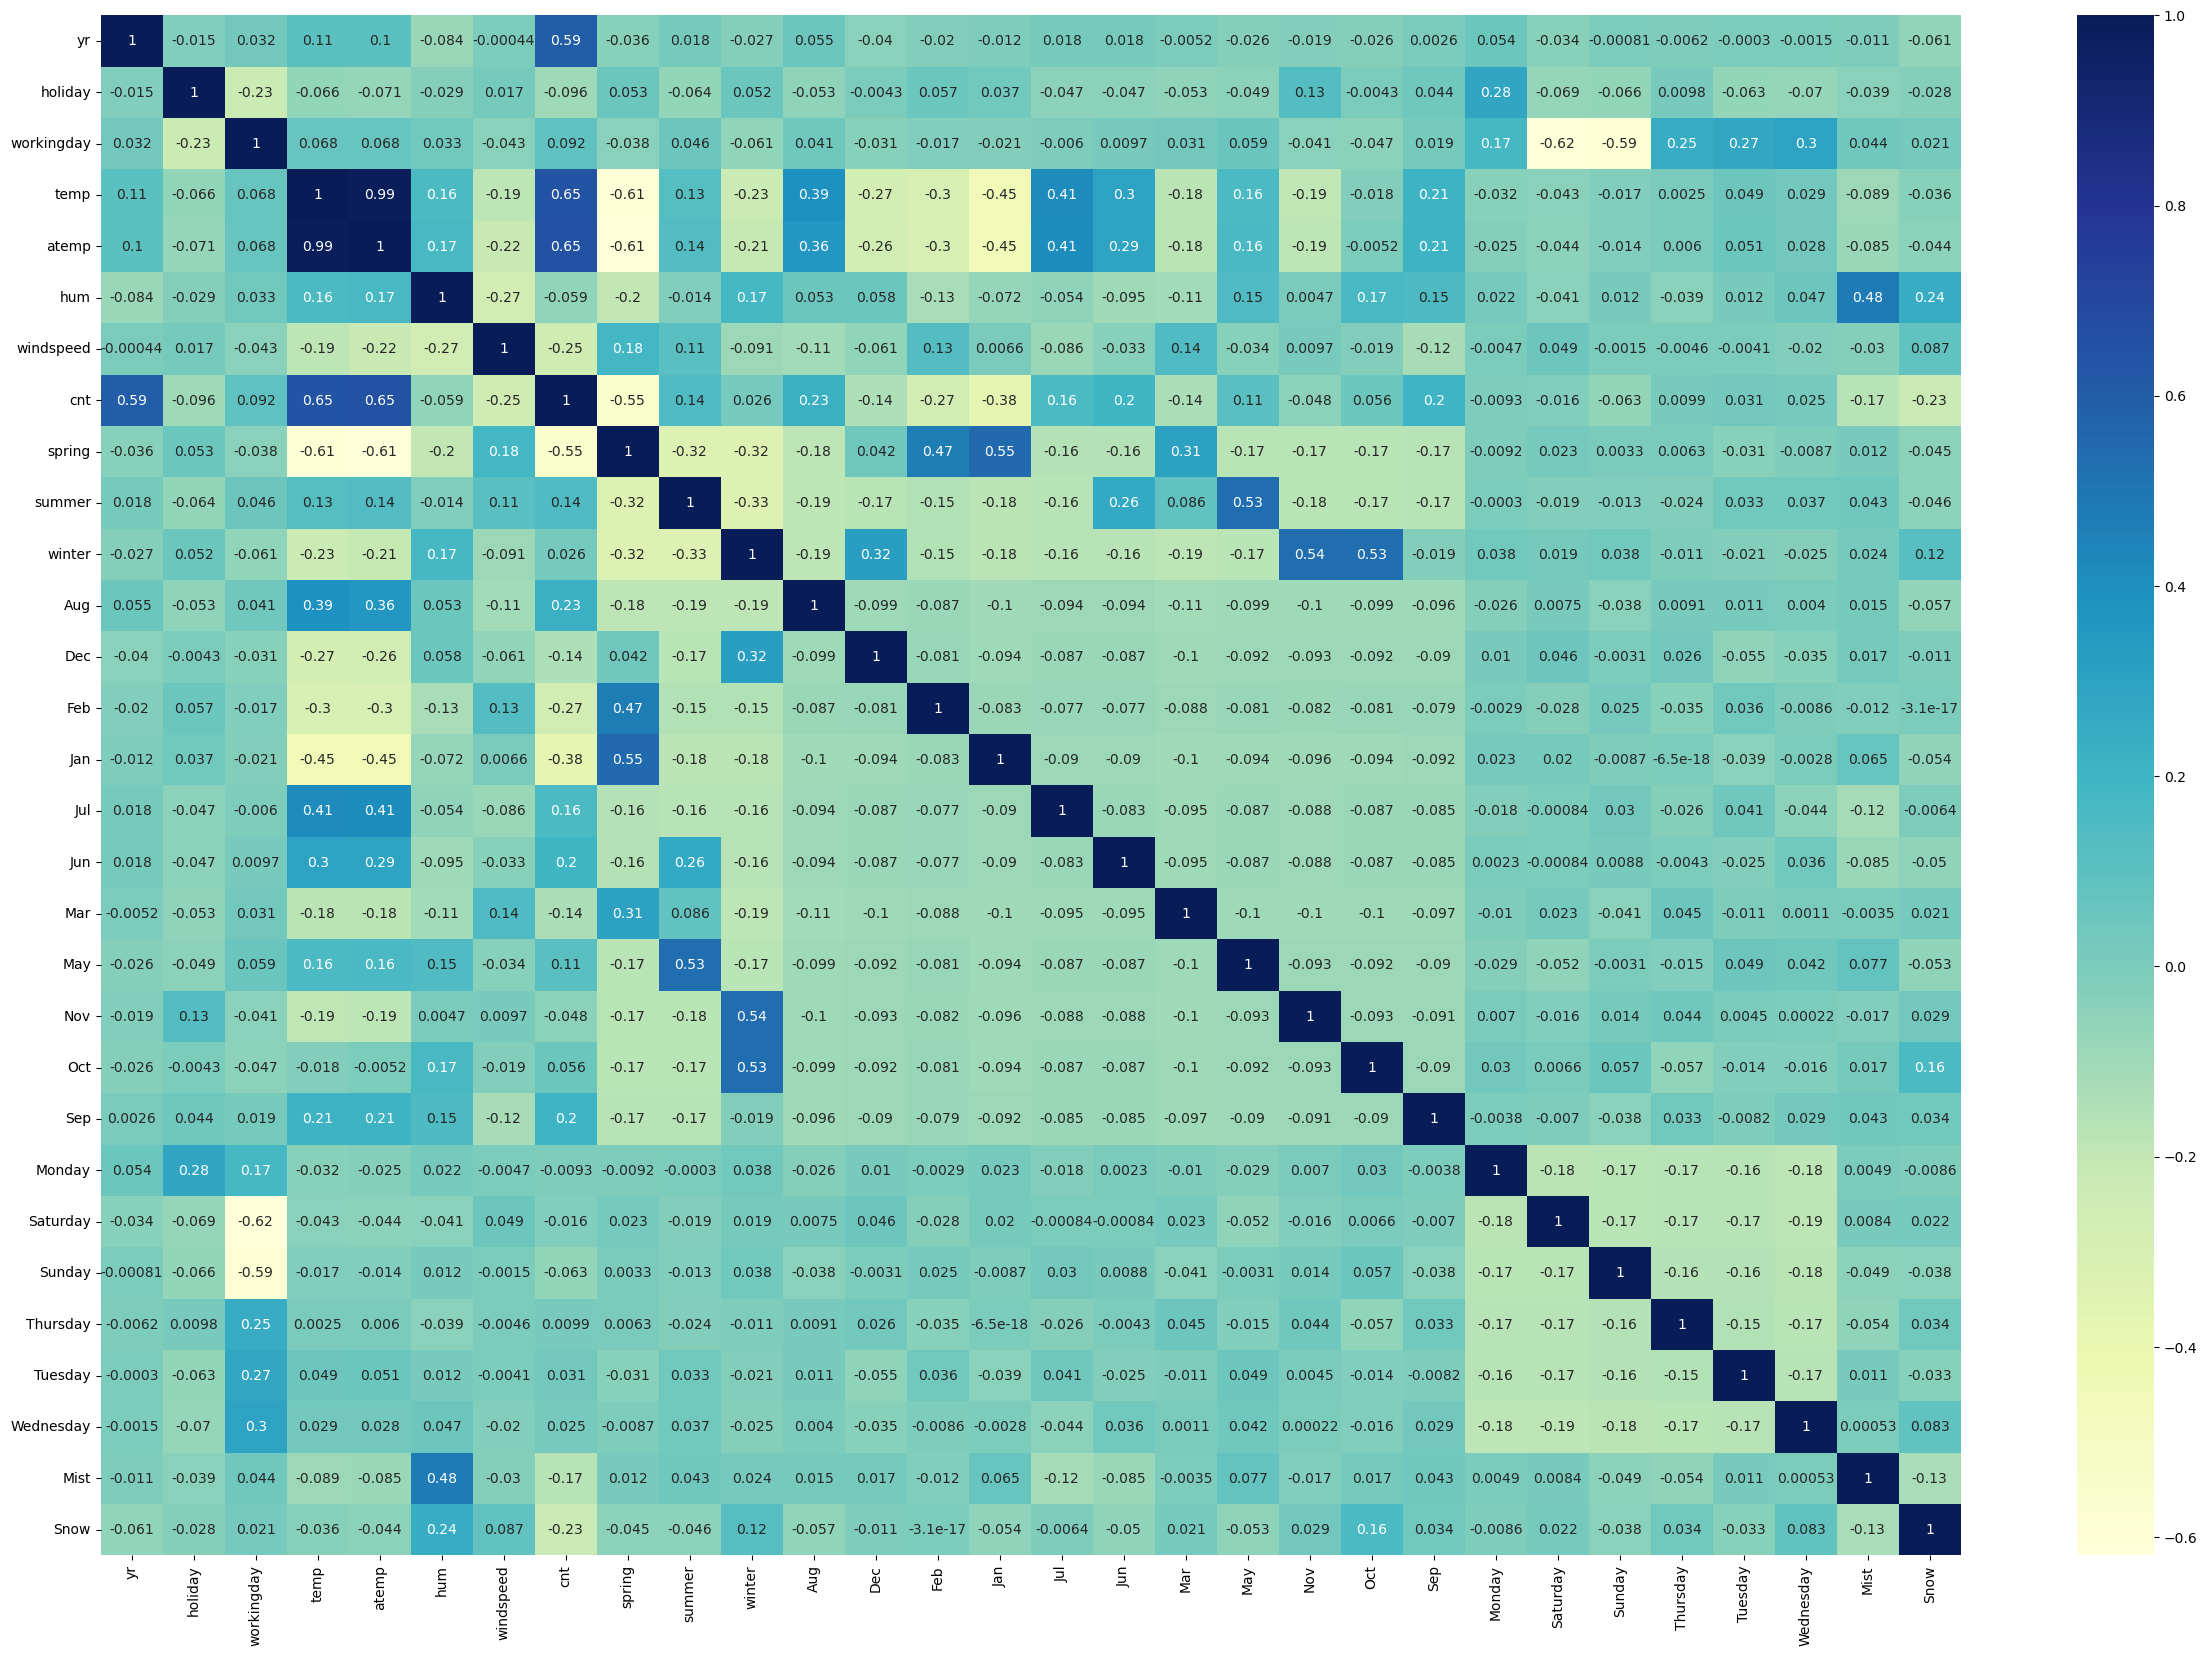

In [19]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [20]:
df_train.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
# Diving into X & y set for model building
y_train = df_train.pop('cnt')
X_train = df_train


In [22]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
# Building the model using stats model learn

## 4. Model Generation

### Model 1 with all the fields.

In [24]:
X_train_model1 = sm.add_constant(X_train)
lm_model1 = sm.OLS(y_train,X_train_model1).fit()
lm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.81e-180
Time:                        03:32:46   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.035      6.887      0.000       0.174       0.313
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday        0.0109      0.024      0.451      0.652      -0.037       0.058
workingday     0.0963      0.012      7.835      0.000       0.072       0.120
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer         0.0424      0.026      1.617      0.107      -0.009       0.094
winter         0.1071      0.028      3.826      0.000       0.052       0.162
Aug            0.0223      0.034      0.657      0.511      -0.044       0.089
Dec           -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb           -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan           -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul           -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun            0.0060      0.025      0.241      0.810      -0.043       0.055
Mar            0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
Nov           -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sep            0.0868      0.032      2.711      0.007       0.024       0.150
Monday        -0.0216      0.015     -1.401      0.162      -0.052       0.009
Saturday       0.0952      0.014      6.910      0.000       0.068       0.122
Sunday         0.0410      0.014      2.929      0.004       0.013       0.068
Thursday      -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tuesday       -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wednesday     -0.0059      0.015     -0.394      0.694      -0.035       0.023
Mist          -0.0595      0.010     -5.701      0.000      -0.080      -0.039
Snow          -0.2550      0.026     -9.631      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     7.48e+15
==============================================================================

N

In [25]:
# In model 1 we have many fields having high p-values, Let reduce the count using RFE

### Model 2 - RFE


In [26]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

steps_to_select = 10
rfe = RFE(estimator=lm, step=steps_to_select)
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 3),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 3),
 ('Mar', False, 3),
 ('May', False, 3),
 ('Nov', False, 2),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Monday', False, 3),
 ('Saturday', True, 1),
 ('Sunday', False, 3),
 ('Thursday', False, 3),
 ('Tuesday', False, 3),
 ('Wednesday', False, 3),
 ('Mist', True, 1),
 ('Snow', True, 1)]

In [28]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Dec',
       'Jan', 'Jul', 'Sep', 'Saturday', 'Mist', 'Snow'],
      dtype='object')

In [29]:
#Dropping these which are rejected by RFE & making the model on top of others
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [30]:
X_train_model2 = X_train[col]

In [31]:
X_train_model2 = sm.add_constant(X_train_model2)

lm_model2 = sm.OLS(y_train,X_train_model2).fit()

lm_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.5
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.64e-187
Time:                        03:32:46   Log-Likelihood:                 508.34
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     495   BIC:                            -923.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3512      0.032     11.107      0.000       0.289       0.413
yr             0.2318      0.008     28.371      0.000       0.216       0.248
holiday       -0.0951      0.026     -3.693      0.000      -0.146      -0.045
temp           0.4507      0.033     13.860      0.000       0.387       0.515
hum           -0.1461      0.038     -3.844      0.000      -0.221      -0.071
windspeed     -0.1822      0.026     -7.029      0.000      -0.233      -0.131
spring        -0.0985      0.015     -6.383      0.000      -0.129      -0.068
winter         0.0540      0.013      4.252      0.000       0.029       0.079
Dec           -0.0286      0.016     -1.774      0.077      -0.060       0.003
Jan           -0.0464      0.018     -2.571      0.010      -0.082      -0.011
Jul           -0.0753      0.017     -4.358      0.000      -0.109      -0.041
Sep            0.0600      0.016      3.858      0.000       0.029       0.091
Saturday       0.0184      0.011      1.645      0.101      -0.004       0.040
Mist          -0.0556      0.011     -5.267      0.000      -0.076      -0.035
Snow          -0.2495      0.027     -9.391      0.000      -0.302      -0.197
==============================================================================
Omnibus:                       66.284   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.306
Skew:                          -0.693   Prob(JB):                     5.13e-34
Kurtosis:                       5.301   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [32]:
def calculate_VIF( X_train_new):
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending= False)
    display(vif)

In [33]:
#for calculating VIF lets remove the constant that is required for the model
X_train_new = X_train_model2.drop(['const'], axis=1)
calculate_VIF(X_train_new)

,Features,VIF
3,hum,24.27
2,temp,16.56
4,windspeed,4.07
5,spring,2.94
12,Mist,2.25
6,winter,2.22
0,yr,2.07
8,Jan,1.73
9,Jul,1.41
7,Dec,1.35


In [34]:
# To take decision on what variables to drop, lets now check with VIF


### Model 3 - remove the one having p-value  Saturday

In [35]:
X_train_model3 = X_train_model2.drop(['Saturday'], axis=1)

In [36]:
X_train_model3 = sm.add_constant(X_train_model3)

lm_model3 = sm.OLS(y_train,X_train_model3).fit()

lm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.0
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          4.33e-188
Time:                        03:32:47   Log-Likelihood:                 506.95
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     496   BIC:                            -926.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3554      0.032     11.257      0.000       0.293       0.417
yr             0.2313      0.008     28.281      0.000       0.215       0.247
holiday       -0.0982      0.026     -3.815      0.000      -0.149      -0.048
temp           0.4509      0.033     13.843      0.000       0.387       0.515
hum           -0.1495      0.038     -3.932      0.000      -0.224      -0.075
windspeed     -0.1807      0.026     -6.964      0.000      -0.232      -0.130
spring        -0.0984      0.015     -6.367      0.000      -0.129      -0.068
winter         0.0545      0.013      4.279      0.000       0.029       0.079
Dec           -0.0275      0.016     -1.702      0.089      -0.059       0.004
Jan           -0.0457      0.018     -2.531      0.012      -0.081      -0.010
Jul           -0.0751      0.017     -4.334      0.000      -0.109      -0.041
Sep            0.0604      0.016      3.878      0.000       0.030       0.091
Mist          -0.0550      0.011     -5.203      0.000      -0.076      -0.034
Snow          -0.2481      0.027     -9.326      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       59.690   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.824
Skew:                          -0.612   Prob(JB):                     3.56e-32
Kurtosis:                       5.306   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#for calculating VIF lets remove the constant that is required for the model
X_train_new = X_train_model3.drop(['const'], axis=1)
calculate_VIF(X_train_new)

,Features,VIF
3,hum,24.27
2,temp,16.52
4,windspeed,4.04
5,spring,2.93
11,Mist,2.25
6,winter,2.21
0,yr,2.07
8,Jan,1.73
9,Jul,1.41
7,Dec,1.34


### Model 4 - Remove the highest VIF - Humidity

In [38]:
X_train_model4 = X_train_model3.drop(['hum'], axis=1)
X_train_model4 = sm.add_constant(X_train_model4)

lm_model4 = sm.OLS(y_train,X_train_model4).fit()

lm_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.72e-186
Time:                        03:32:47   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2780      0.025     11.102      0.000       0.229       0.327
yr             0.2349      0.008     28.496      0.000       0.219       0.251
holiday       -0.0988      0.026     -3.785      0.000      -0.150      -0.048
temp           0.4185      0.032     13.091      0.000       0.356       0.481
windspeed     -0.1538      0.025     -6.057      0.000      -0.204      -0.104
spring        -0.1011      0.016     -6.455      0.000      -0.132      -0.070
winter         0.0457      0.013      3.597      0.000       0.021       0.071
Dec           -0.0332      0.016     -2.032      0.043      -0.065      -0.001
Jan           -0.0508      0.018     -2.777      0.006      -0.087      -0.015
Jul           -0.0673      0.017     -3.857      0.000      -0.102      -0.033
Sep            0.0572      0.016      3.622      0.000       0.026       0.088
Mist          -0.0788      0.009     -8.977      0.000      -0.096      -0.062
Snow          -0.2895      0.025    -11.678      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       62.396   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.665
Skew:                          -0.640   Prob(JB):                     1.92e-33
Kurtosis:                       5.335   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#for calculating VIF lets remove the constant that is required for the model
X_train_new = X_train_model4.drop(['const'], axis=1)
calculate_VIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.01
4,spring,2.36
0,yr,2.06
5,winter,1.64
7,Jan,1.64
10,Mist,1.54
8,Jul,1.36
6,Dec,1.29
9,Sep,1.20


### Model 5 - Remove December having high p-value

In [40]:
X_train_model5 = X_train_model4.drop(['Dec'], axis=1)
X_train_model5 = sm.add_constant(X_train_model5)

lm_model5 = sm.OLS(y_train,X_train_model5).fit()

lm_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.87e-186
Time:                        03:32:47   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2671      0.025     10.886      0.000       0.219       0.315
yr             0.2350      0.008     28.415      0.000       0.219       0.251
holiday       -0.0972      0.026     -3.712      0.000      -0.149      -0.046
temp           0.4316      0.031     13.743      0.000       0.370       0.493
windspeed     -0.1480      0.025     -5.848      0.000      -0.198      -0.098
spring        -0.1027      0.016     -6.545      0.000      -0.134      -0.072
winter         0.0408      0.013      3.259      0.001       0.016       0.065
Jan           -0.0431      0.018     -2.402      0.017      -0.078      -0.008
Jul           -0.0694      0.017     -3.972      0.000      -0.104      -0.035
Sep            0.0583      0.016      3.683      0.000       0.027       0.089
Mist          -0.0787      0.009     -8.938      0.000      -0.096      -0.061
Snow          -0.2867      0.025    -11.549      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       58.688   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.828
Skew:                          -0.612   Prob(JB):                     1.18e-30
Kurtosis:                       5.233   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X_train_new = X_train_model5.drop(['const'], axis=1)

calculate_VIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.01
4,spring,2.24
0,yr,2.06
6,Jan,1.60
9,Mist,1.53
5,winter,1.39
7,Jul,1.36
8,Sep,1.20
10,Snow,1.08


### Model 6 - Remove January having high p-value

In [42]:
X_train_model6 = X_train_model5.drop(['Jan'], axis=1)
X_train_model6 = sm.add_constant(X_train_model6)

lm_model6 = sm.OLS(y_train,X_train_model6).fit()

lm_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          3.10e-186
Time:                        03:32:47   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2531      0.024     10.569      0.000       0.206       0.300
yr             0.2342      0.008     28.210      0.000       0.218       0.251
holiday       -0.0980      0.026     -3.727      0.000      -0.150      -0.046
temp           0.4498      0.031     14.686      0.000       0.390       0.510
windspeed     -0.1395      0.025     -5.540      0.000      -0.189      -0.090
spring        -0.1123      0.015     -7.360      0.000      -0.142      -0.082
winter         0.0449      0.012      3.602      0.000       0.020       0.069
Jul           -0.0729      0.018     -4.167      0.000      -0.107      -0.039
Sep            0.0573      0.016      3.606      0.000       0.026       0.089
Mist          -0.0796      0.009     -9.014      0.000      -0.097      -0.062
Snow          -0.2855      0.025    -11.445      0.000      -0.334      -0.236
==============================================================================
Omnibus:                       57.674   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.692
Skew:                          -0.599   Prob(JB):                     2.08e-30
Kurtosis:                       5.235   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X_train_new = X_train_model6.drop(['const'], axis=1)

calculate_VIF(X_train_new)

,Features,VIF
2,temp,4.61
3,windspeed,4.00
0,yr,2.06
4,spring,1.64
8,Mist,1.52
5,winter,1.39
6,Jul,1.35
7,Sep,1.20
9,Snow,1.08
1,holiday,1.04


## 5. Residual Analysis

In [44]:
y_train_pred = lm_model6.predict(X_train_model6)

<Axes: ylabel='Density'>

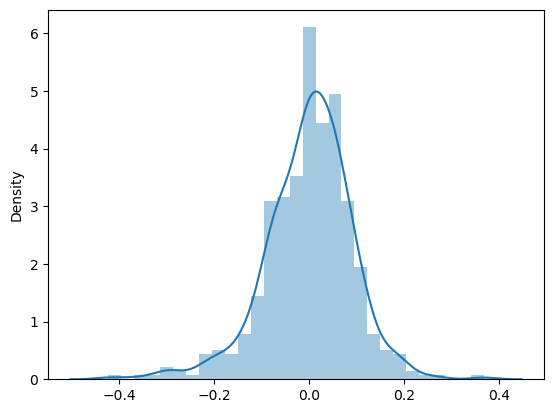

In [45]:
res = y_train - y_train_pred
sns.distplot(res)

## 6. Prediction & evaluation of the test set

In [46]:
#apply scaler to all categorical columns- temp	atemp	hum	windspeed	cnt	
num_vars = ['temp','atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [47]:
# Diving into X & y set for model building
y_test = df_test.pop('cnt')
X_test = df_test

In [48]:
X_test_new = X_test[X_train_model6.drop(['const'], axis=1).columns]

In [49]:
X_test_new.head()

,yr,holiday,temp,windspeed,spring,winter,Jul,Sep,Mist,Snow
184,0,1,0.831783,0.084219,0,0,1,0,1,0
535,1,0,0.901354,0.153728,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0


In [50]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_test_pred = lm_model6.predict(X_test_new)

<Axes: ylabel='Density'>

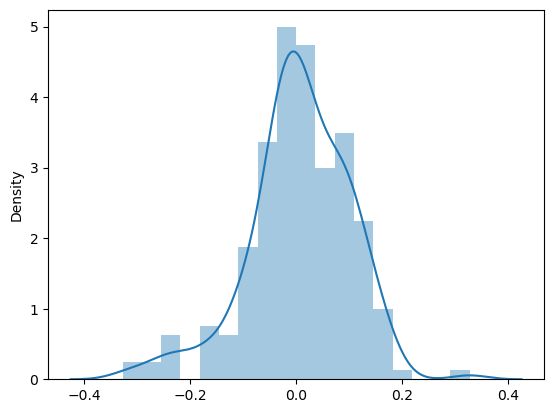

In [51]:
res = y_test - y_test_pred
sns.distplot(res)

## 7. Model Evaluation

Text(0, 0.5, 'y_test_pred')

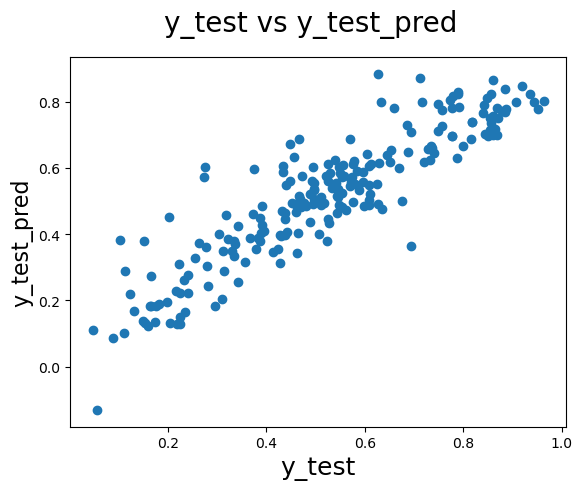

In [52]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

## 8. R2 Score

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8074869048294193